# E-commerce Customer Segmentation

### Problem Statement:
- A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. 
- The trend can be easily observed if the companies can group the customers; based on their activity on the e-commerce site. 
- This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on.
- Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest. 

## Importing necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# reading the csv file from local
df = pd.read_excel(r"D:\GUVI-ZEN DS-Projects\Final\cust_data.xlsx")
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


## Data cleaning and preprocessing

In [6]:
df.shape

(30000, 38)

In [7]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [8]:
(df.isnull().sum()/len(df))*100

Cust_ID                   0.00
Gender                    9.08
Orders                    0.00
Jordan                    0.00
Gatorade                  0.00
Samsung                   0.00
Asus                      0.00
Udis                      0.00
Mondelez International    0.00
Wrangler                  0.00
Vans                      0.00
Fila                      0.00
Brooks                    0.00
H&M                       0.00
Dairy Queen               0.00
Fendi                     0.00
Hewlett Packard           0.00
Pladis                    0.00
Asics                     0.00
Siemens                   0.00
J.M. Smucker              0.00
Pop Chips                 0.00
Juniper                   0.00
Huawei                    0.00
Compaq                    0.00
IBM                       0.00
Burberry                  0.00
Mi                        0.00
LG                        0.00
Dior                      0.00
Scabal                    0.00
Tommy Hilfiger            0.00
Holliste

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [10]:
df.Gender.unique()

array(['M', 'F', nan], dtype=object)

In [11]:
# filling the null values of gender column with mode value
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [12]:
df.duplicated().sum()

0

In [13]:
# descriptive statistical analysis of the customer data
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,0.140133,0.328200,0.209333,0.141467,0.161100,0.106100,0.300233,0.048067,0.754800,0.247900,0.470833,0.258000,0.118767,0.031967,0.428033,0.121333,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,0.471278,0.807655,1.116820,0.529210,0.604835,0.516512,1.119167,0.338763,1.262166,0.724106,1.346159,0.848288,0.597612,0.264475,1.098876,0.478977,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [14]:
# finding the unique number of values in each column of the dataset
for i in df.columns:
    print(i, ':', df[i].nunique())

Cust_ID : 30000
Gender : 2
Orders : 13
Jordan : 16
Gatorade : 13
Samsung : 20
Asus : 17
Udis : 13
Mondelez International : 13
Wrangler : 10
Vans : 16
Fila : 15
Brooks : 10
H&M : 16
Dairy Queen : 24
Fendi : 14
Hewlett Packard : 10
Pladis : 11
Asics : 25
Siemens : 11
J.M. Smucker : 27
Pop Chips : 17
Juniper : 29
Huawei : 16
Compaq : 19
IBM : 9
Burberry : 21
Mi : 9
LG : 13
Dior : 12
Scabal : 11
Tommy Hilfiger : 9
Hollister : 10
Forever 21 : 9
Colavita : 15
Microsoft : 13
Jiffy mix : 9
Kraft : 12


In [15]:
# since Cust_ID has all unique values so it does not seems useful for model building
df.drop('Cust_ID', axis=1, inplace=True)

In [16]:
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,F,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


<Axes: >

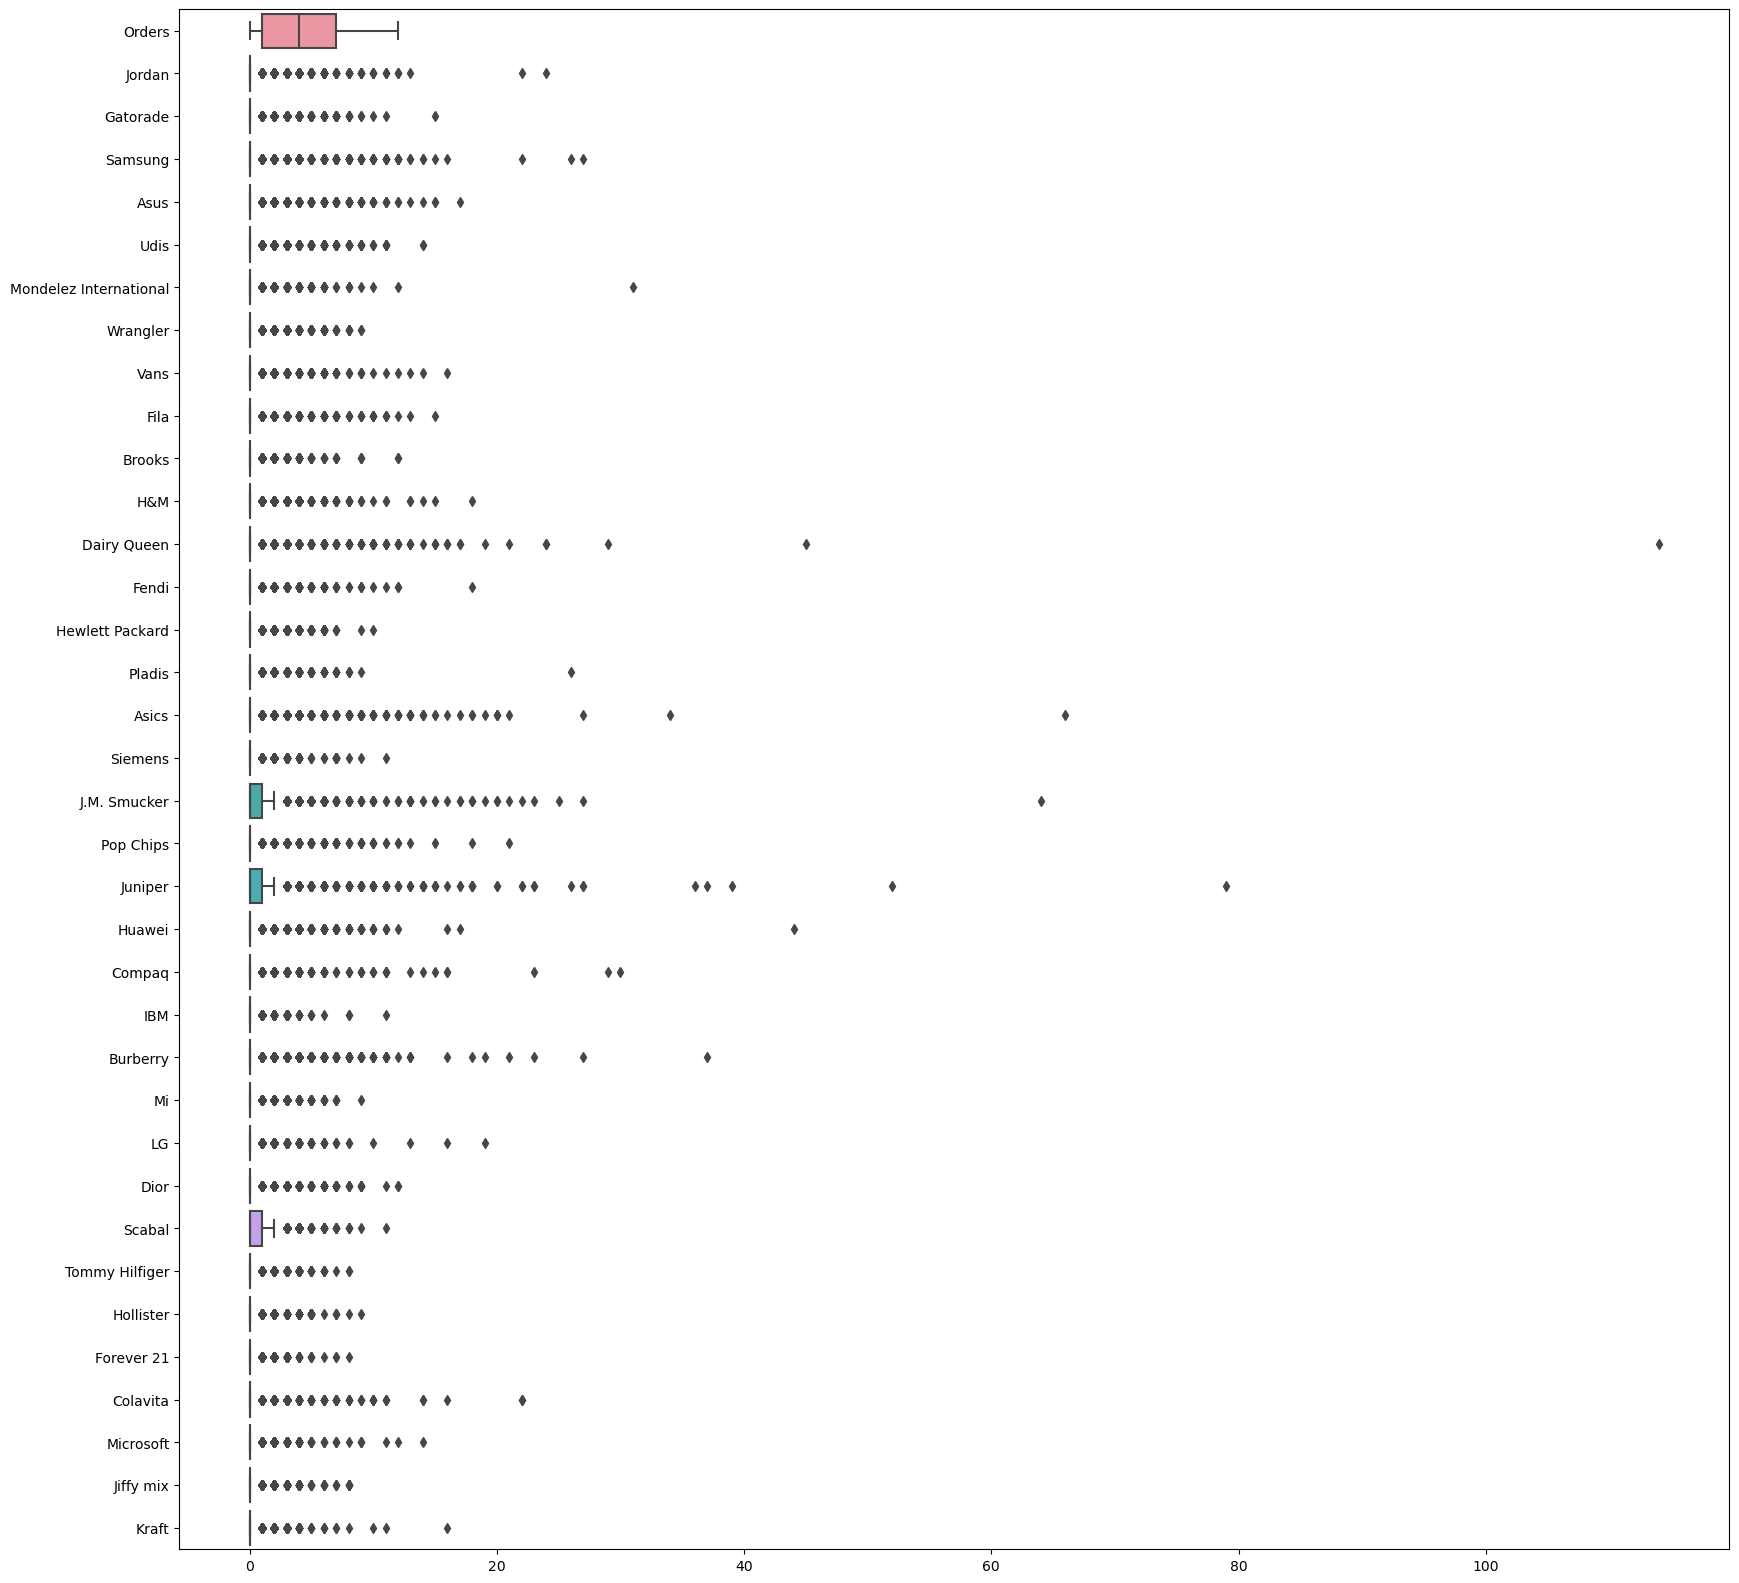

In [17]:
# checking the outliers using boxplot
plt.figure(figsize=(20,20))
sns.boxplot(df, orient = 'h')

In [18]:
# the whole dataset seems to have outliers in every columns 
# these outliers are not to be treated as the dataset values are unique for each customer
# so there is no need of outlier treatment

In [19]:
# as 'gender' column has textual categorical values 
# column 'gender' is Label encoded for its values into numerical values
df['Gender'] = df['Gender'].replace({'M':0, 'F':1})

In [20]:
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [21]:
# scaling the data is very important preprocessing step for k-means algorithm
# thus standard scalar is used 
scaler = StandardScaler()
data = scaler.fit_transform(df)

In [22]:
data

array([[-2.17828495,  0.78830146, -0.33231249, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [ 0.45907676, -1.16142302, -0.33231249, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-2.17828495,  0.78830146, -0.33231249, ...,  1.97870833,
        -0.22048554, -0.18277495],
       ...,
       [-2.17828495, -1.16142302, -0.33231249, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-2.17828495, -1.16142302, -0.33231249, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [ 0.45907676, -0.32582681,  2.15288625, ..., -0.26057832,
        -0.22048554, -0.18277495]])

## K-Means Model Building

In [23]:
# finding the best K with hieghest within cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [24]:
for i in range(1,11):
    print('The WCSS value for',i,'clusters is',wcss[i-2])

The WCSS value for 1 clusters is 882264.4671571653
The WCSS value for 2 clusters is 1110000.0000000035
The WCSS value for 3 clusters is 1058328.7620752305
The WCSS value for 4 clusters is 1026397.4866758317
The WCSS value for 5 clusters is 1000729.8675799326
The WCSS value for 6 clusters is 977433.0721730923
The WCSS value for 7 clusters is 955801.8249172203
The WCSS value for 8 clusters is 938130.614793433
The WCSS value for 9 clusters is 915283.9810861729
The WCSS value for 10 clusters is 898007.8181694678


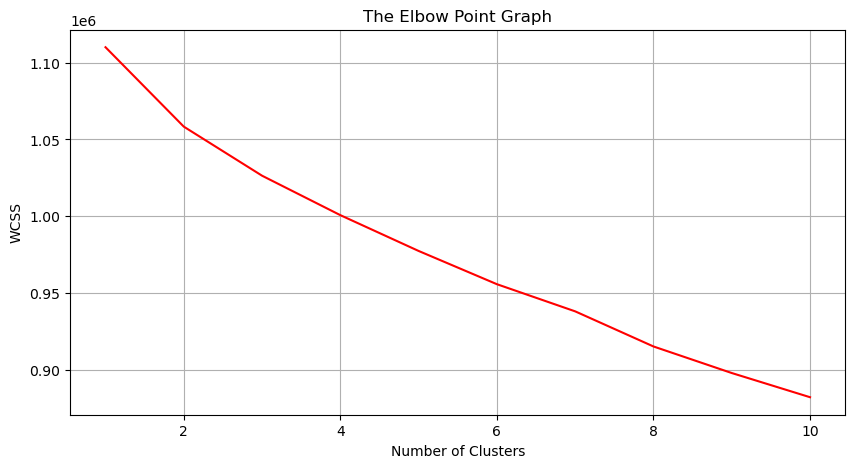

In [25]:
# ploting the elbow graph for fiding the best K-value
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,11), y = wcss, color = 'red')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [26]:
# from the elbow plot it is found that K=2 forms an elbow 
# thus could infer that the given customer datas can be grouped into 2 clusters

In [27]:
# finding the silhoette score for a range of K-values 
scores=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    score = silhouette_score(data, labels)
    scores.append(score)
    print(f'n_clusters = {i}, silhouette_score = {score:.3f} ')

n_clusters = 2, silhouette_score = 0.397 
n_clusters = 3, silhouette_score = 0.084 
n_clusters = 4, silhouette_score = 0.083 
n_clusters = 5, silhouette_score = 0.086 
n_clusters = 6, silhouette_score = 0.083 
n_clusters = 7, silhouette_score = 0.089 
n_clusters = 8, silhouette_score = 0.088 
n_clusters = 9, silhouette_score = 0.095 
n_clusters = 10, silhouette_score = 0.092 


In [28]:
# from the silhoette scores also could infer that n_clusters=2 has the highest value

In [29]:
kmeans = KMeans(n_clusters= 2, random_state= 42)
kmeans.fit(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [30]:
df['cluster'] = labels
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,0,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,0
2,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0


## Cluster Profiling 

In [31]:
df['cluster'].value_counts()

1    26577
0     3423
Name: cluster, dtype: int64

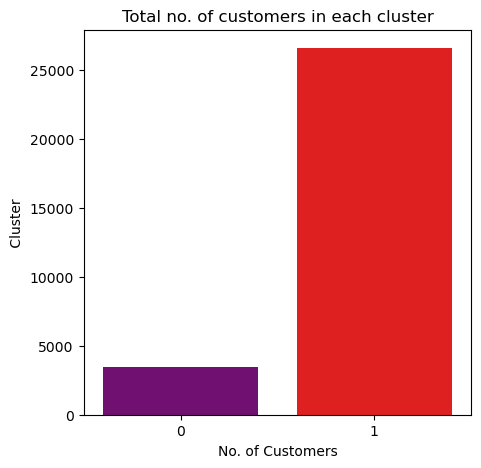

In [32]:
# pltting bar graph for the value counts of grouped clusters
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='cluster', palette = ['purple', 'red'])
plt.title('Total no. of customers in each cluster')
plt.xlabel('No. of Customers')
plt.ylabel(' Cluster ')
plt.show()

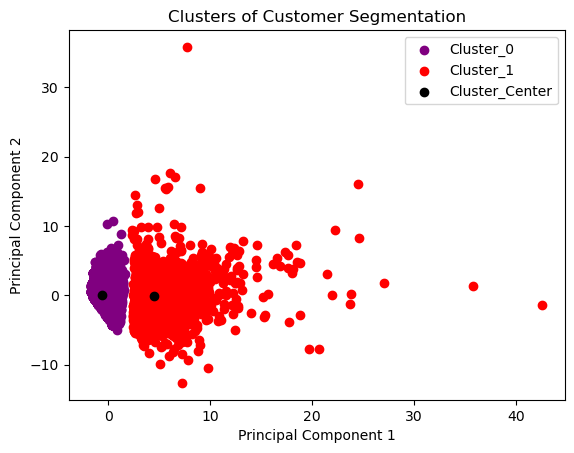

In [33]:

scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(reduced_data)
centers = kmeans.cluster_centers_

plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], c='purple', marker='o', label='Cluster_0')
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], c='red', marker='o', label='Cluster_1')
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='o', label='Cluster_Center')
plt.title('Clusters of Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [34]:
clusters = df.groupby('cluster').sum()
clusters.drop('Gender', axis=1).sort_values(by=[1], axis=1)

,IBM,Forever 21,Kraft,Pladis,Siemens,Hollister,Jiffy mix,LG,Wrangler,Fila,Microsoft,Mi,Vans,Tommy Hilfiger,Compaq,Dairy Queen,Brooks,Fendi,Udis,Mondelez International,Asus,Colavita,Hewlett Packard,Pop Chips,Samsung,Dior,Gatorade,Huawei,Jordan,Burberry,H&M,Asics,Scabal,Juniper,J.M. Smucker,Orders
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,198,879,1211,2185,256,1109,1314,1554,1071,567,1188,1209,903,2200,964,3623,1373,1391,1215,1083,1296,2125,1127,2671,1644,2923,2092,2257,2489,6792,3357,2442,3043,3737,5671,15123
1,761,841,916,998,1186,1221,1327,1522,2137,2261,2303,2431,2440,2569,2599,2657,2831,2853,3091,3110,3544,3641,3706,4766,5044,5211,5478,5483,5534,6049,6489,6565,8059,10388,16973,109971


In [35]:
cg = df.groupby(['cluster', 'Gender']).sum()
cg

Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
cluster Gender                                                  
0       0         1316     228       261      125    12    22   
        1        13807    2261      1831     1519  1284  1193   
1       0        21148    1420      2081      972    36   159   
        1        88823    4114      3397     4072  3508  2932   

                Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
cluster Gender                                                               
0       0                           43        14   189    47     172    83   
        1                         1040      1057   714   520    1201  3274   
1       0                          417        33  1266   547     872   316   
        1                         2693      2104  1174  1714    1959  6173   

                Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  \
cluster Gender                                                                
0       0               340     94               35     198    335       52   
        1              3283   1297             1092    1987   2107      204   
1       0               505    339              444     131   1507      244   
        1              2152   2514             3262     867   5058      942   

                J.M. Smucker  Pop Chips  Juniper  Huawei  Compaq  IBM  \
cluster Gender                                                          
0       0                473        270      550     182     223   51   
        1               5198       2401     3187    2075     741  147   
1       0               3255       1074     1702     892     504  179   
        1              13718       3692     8686    4591    2095  582   

                Burberry    Mi    LG  Dior  Scabal  Tommy Hilfiger  Hollister  \
cluster Gender                                                                  
0       0            438    44    93   204      50             128         50   
        1           6354  1165  1461  2719    2993            2072       1059   
1       0            537   192   150   609     326             316        179   
        1           5512  2239  1372  4602    7733            2253       1042   

                Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
cluster Gender                                                     
0       0               39       294        154        146    175  
        1              840      1831       1034       1168   1036  
1       0               99       712        401        247    175  
        1              742      2929       1902       1080    741

In [36]:
cluster_0 = df[df['cluster']==0]
cluster_0 = cluster_0.groupby('Gender').sum().sort_values(by=[1], axis=1)
cluster_0.drop('cluster', axis=1)

,IBM,Siemens,Fila,Vans,Compaq,Forever 21,Microsoft,Kraft,Mondelez International,Wrangler,Hollister,Hewlett Packard,Mi,Jiffy mix,Udis,Brooks,Asus,Fendi,LG,Samsung,Gatorade,Colavita,Pladis,Tommy Hilfiger,Huawei,Asics,Jordan,Pop Chips,Dior,Scabal,Juniper,H&M,Dairy Queen,J.M. Smucker,Burberry,Orders
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,51,52,47,189,223,39,154,175,43,14,50,35,44,146,22,172,12,94,93,125,261,294,198,128,182,335,228,270,204,50,550,83,340,473,438,1316
1,147,204,520,714,741,840,1034,1036,1040,1057,1059,1092,1165,1168,1193,1201,1284,1297,1461,1519,1831,1831,1987,2072,2075,2107,2261,2401,2719,2993,3187,3274,3283,5198,6354,13807


In [37]:
cluster_1 = df[df['cluster']==1]
cluster_1 = cluster_1.groupby('Gender').sum().sort_values(by=[1], axis=1)
cluster_1.drop('cluster', axis=1)

,IBM,Kraft,Forever 21,Pladis,Siemens,Hollister,Jiffy mix,Vans,LG,Fila,Microsoft,Brooks,Compaq,Wrangler,Dairy Queen,Mi,Tommy Hilfiger,Fendi,Mondelez International,Colavita,Udis,Hewlett Packard,Gatorade,Asus,Pop Chips,Samsung,Jordan,Huawei,Dior,Asics,Burberry,H&M,Scabal,Juniper,J.M. Smucker,Orders
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,179,175,99,131,244,179,247,1266,150,547,401,872,504,33,505,192,316,339,417,712,159,444,2081,36,1074,972,1420,892,609,1507,537,316,326,1702,3255,21148
1,582,741,742,867,942,1042,1080,1174,1372,1714,1902,1959,2095,2104,2152,2239,2253,2514,2693,2929,2932,3262,3397,3508,3692,4072,4114,4591,4602,5058,5512,6173,7733,8686,13718,88823


## Cluster Profiling Report

#### 1. Most Ordered cluster out of two irrespective of Gender
Customers belonging to cluster 1 has placed many orders as compared to customers of cluster 0 
- cluster 1 => 109971
- cluster 0 => 15123

#### 2. Most seached E-Commerse brand irrespective Gender
- most searched brand with customers of cluster 1 is J.M. Smucker
- likewise most brand website with customers of cluster 0 is Burberry

#### 3. Most and Least visited top 5 brands by each cluster's customers irrespective gender
##### Cluster 1 
- Most visited by customers of cluster 1
    - J.M. Smucker -> Food & Beverages
    - Juniper -> Networking products - routers, switches, firewalls
    - Scabal -> Clothing for Men
    - Asics -> Sports & Footwear
    - H&M -> Clothing & Fashion                                                     
- Least visited by customers of cluster 1 
    - Hollister ->  Clothing & Fashion - for young adults
    - Siemens -> Healthcare
    - Pladis -> Confectionery & Snack foods
    - Kraft -> Food & Beverages
    - Forever 21 ->  Clothing & Fashion - for men, women & children 
    - IBM -> Technology - Hardware Products
##### Cluster 0
- Most visited by customers of cluster 0
    - Burberry -> Clothing & Fashion                                                     
    - J.M. Smucker -> Food & Beverages
    - Dairy Queen -> Food & Ice-creams
    - H&M -> Clothing & Fashion 
    - Juniper -> Networking products - routers, switches, firewalls
- Least visited by customers of cluster 0 
    - Vans -> skateboarding shoes and Accessories
    - Forever 21 ->  Clothing & Fashion - for men, women & children 
    - Fila -> Sportswear & Accessories
    - Kraft -> Food & Beverages
    - Siemens -> Healthcare
    - IBM -> Technology - Hardware Products
    
#### 4. Gender wise customer analysis
 - It is clearly understood that female are more often tend to place orders through online irespective of two clusters 

### Conclusion from Cluster Profiling after performing K-Means Clustering Algorithm

Cluster 1
- As customers in this cluster have placed orders ten times more than customers in Cluster 0, suggesting more recommendations and promoting products such as Food & Beverages, Sportswear, Clothing, and Networking Products would likely encourage them to purchase related items.

- Additionally, customers in this cluster don't seem to show much interest in specific brands of clothing and foods. Offering combo deals and discounts on these selected products could potentially incentivize their purchase.

- Furthermore, they seem less inclined to purchase technology-related products such as hardware and chipsets. To stimulate interest, consider offering these products at reduced prices and providing special deals on technology products, which currently attract less attention when bundled with the products they show more interest in purchasing.

Cluster 0 
- Customers in this cluster exhibit a high level of interest in purchasing Food & Beverages compared to other categories. Additionally, they show interest in clothing and fashion, and to some extent, in networking products. Recommending more products in the Food & Beverages and clothing categories can encourage continuous purchasing.
- They display less interest in sports accessories, so offering special seasonal offers on trending sports products may increase their interest during specific times.
- Moreover, they appear to have little interest in buying healthcare products. To address this, providing special promotions and emphasizing the importance and benefits of healthcare products, along with offering combo deals and discounted prices specifically for these customers, could be effective.

Overall suggestion on Customer-Product recommendation
- As there are more female customers, it's a good idea to focus on promoting a wider range of women's fashion. Offering combo deals on related products could encourage more online purchases from female customers.

- For food and drinks, you can attract more buyers by offering discounts on popular combinations. By using customer data, you can make personalized offers based on what each customer likes. Also, promoting seasonal and trending food and drinks with special deals can create excitement and make customers want to try new things.

- In clothing, suggesting different styles for both men and women can make shopping more interesting. Encouraging customers to check out new arrivals adds to their shopping experience.

- Remember, building strong customer relationships is key to keeping people shopping online. Good delivery services and well-packaged products make customers happy and ensure they enjoy their online shopping. Even though it's online, creating a positive experience for customers is really important